Demostrate consequences of No Free Lunch Theorem: every model of machine learning makes assumptions about dataset properties. If the assumption fails, model perfoms badly. If the assumption is met, model perfoms good.
For each of the tasks, described below:
create a dataset to meet the description. For demonstration purposes, feature dimension size = 2
train the models and evaluate accuracy. (with a training pipeline, described in the seminar)
Show which model is better.
Write what assumptions were used, and why model exibits such behavior.
Plot dataset to demonstrate its properties. (Scatter plot, classes with different colors)
Tasks:
Create dataset for binary classification task (binary crossentropy), where k-NN perfoms worse than logistic regression
Create dataset for binary classification task (binary crossentropy), where logistic regression perfoms worse than k-NN
Create dataset for binary classification task (binary crossentropy), where k-NN with cosine distance perfoms better than k-NN with euclidean distance
! If there is no explanation, why one model perfoms better than the other on your dataset, the task does not count.
! if the training pipeline is not used, the task does not count.


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_circles
from sklearn.datasets import make_classification

In [0]:
#как было сказано в семинаре
def model_pipeline(model, X, y, hyper_parametrs):
  with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    model.fit(X_train, y_train)

    valid = GridSearchCV(model, param_grid = hyper_parametrs, cv = 5)
    valid.fit(X_train, y_train)

    model = valid.best_estimator_
    print (f"Train : {model.score(X_train, y_train)} \nAfter regularization: {valid.best_score_} \nBest params: {valid.best_params_} \nTest: {model.score(X_test, y_test)}")  

**Задание 1**

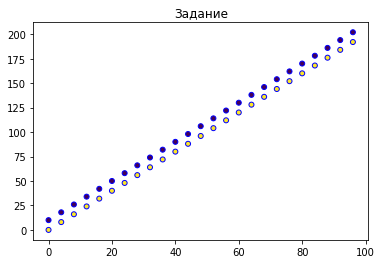

In [53]:
plt.title("Задание")
#X1, Y1 = make_classification(n_samples=100, n_informative=2, n_redundant=0, n_features=2, n_classes=2, random_state=50)

d1 = [(x, 2*x) for x in range(0, 100, 4)]
d0 = [(x, z+10) for x, z in d1]
X1 = np.array(d1+d0)
Y1 = np.array([1 for i in range(25)] + [0 for i in range(25)])

plt.scatter(X1[:, 0], X1[:, 1], c=Y1,
            s=25, edgecolor='b')

In [0]:
params_logreg = {'dual' : [True, False], 'C': np.arange(.01,1,.01), 'solver' : ['liblinear']}

In [31]:
model_pipeline(LogisticRegression(), X1, Y1, params_logreg)

Train : 1.0 
After regularization: 1.0 
Best params: {'C': 0.01, 'dual': True, 'solver': 'liblinear'} 
Test: 1.0


In [0]:
paramsKNN = {'n_neighbors': range(1, 10), 'weights' : ['uniform', 'distance'], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [33]:
model_pipeline(KNeighborsClassifier(), X1, Y1, paramsKNN)

Train : 0.8378378378378378 
After regularization: 0.6857142857142857 
Best params: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'} 
Test: 0.3076923076923077


Логистическая регрессия работает хорошо, потому что значения идеально разделяются по прямой . K-NN работает хуже, потому что точки расположены близко друг к другу.

**Задание 2**

In [0]:
X, y = make_circles(factor=0.5, random_state=50, noise=0.05)

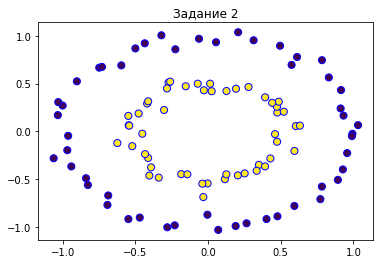

In [9]:
plt.title("Задание 2")
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='b')

In [10]:
model_pipeline(LogisticRegression(), X, y, params_logreg)

Train : 0.5333333333333333 
After regularization: 0.5333333333333333 
Best params: {'C': 0.01, 'dual': True, 'solver': 'liblinear'} 
Test: 0.4


In [11]:
model_pipeline(KNeighborsClassifier(), X, y, paramsKNN)

Train : 1.0 
After regularization: 1.0 
Best params: {'algorithm': 'auto', 'n_neighbors': 2} 
Test: 0.96


А здесь логистическая регрессия работает плохо, потому что нельзя разделить на два класса прямой. А соседи наоборот хорошо, потому что данные по классам близко друг к другу.

**Задание 3**

In [0]:
N = 100
x = np.arange(0,N//2)
X1 = np.array([(x[i], 0) for i in range(0,N//2)])
X2 = np.array([(x[i], np.random.randint(1, 10, 1)[0]) for i in range(0, N//2)])
X3 = np.append(X1,X2, axis=0)

In [0]:
Y3 = np.array([0 if i < N//2 else 1 for i in range(N)])

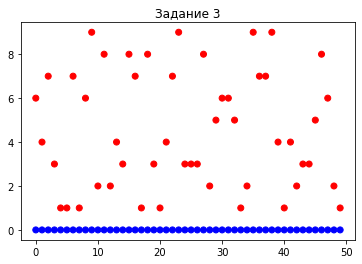

In [73]:
plt.title('Задание 3')
plt.scatter([el[0] for el in X3],[el[1] for el in X3],
            c=['red' if el == 1 else 'blue' for el in Y3])

In [74]:
model_pipeline(KNeighborsClassifier(metric="euclidean"), X3, Y3, paramsKNN)

Train : 1.0 
After regularization: 0.9066666666666666 
Best params: {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'} 
Test: 0.84


In [75]:
model_pipeline(KNeighborsClassifier(metric="cosine"), X3, Y3, {'n_neighbors': range(1, 10)})

Train : 1.0 
After regularization: 0.9866666666666667 
Best params: {'n_neighbors': 1} 
Test: 1.0


Евклидо метрика смотрит на конкертное расстрояние, а косинусная близость - на напрвление векторов => чтобы евклидово расстояние работало хуже, нам нужны данные, где расстояние между значениями не играет роли. Например, как показано на графике. 